In [425]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [426]:
df=pd.read_csv('happiness_score_dataset.csv')


In [427]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [428]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [429]:
df.shape

(158, 12)

we have 158 rows and 12 columns including the target column

In [430]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [431]:
#Statistical Summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [432]:
#Checking the null values in dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

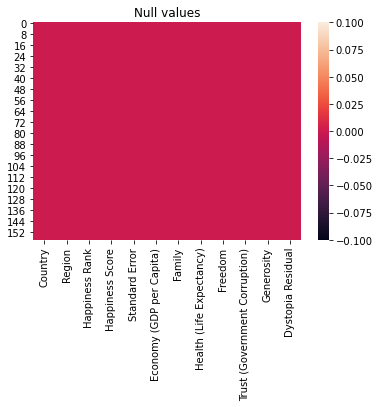

In [433]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no null values in the dataset

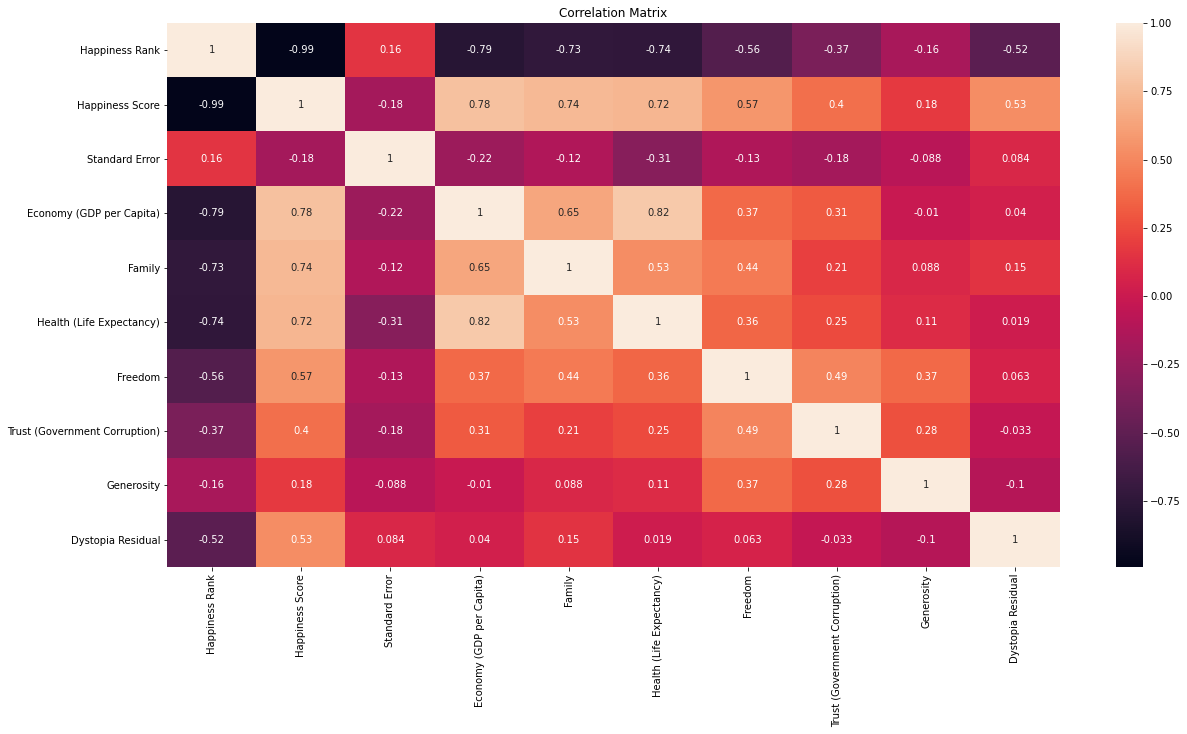

In [434]:
corr_mat=df.corr() #Multivariate analysis
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix,we can see that econpmy,family,health are highly correlated with happiness score and Happiness score is very negatively correlated with happiness rank.

In [435]:
corr_matrix=df.corr()
corr_matrix['Dystopia Residual'].sort_values(ascending=False)


Dystopia Residual                1.000000
Happiness Score                  0.530474
Family                           0.148117
Standard Error                   0.083981
Freedom                          0.062783
Economy (GDP per Capita)         0.040059
Health (Life Expectancy)         0.018979
Trust (Government Corruption)   -0.033105
Generosity                      -0.101301
Happiness Rank                  -0.521999
Name: Dystopia Residual, dtype: float64

Now we can clearly identify the correlation of independent variable with target variable 'Dystopia Residual'.

There are 3 variables who has less than 0.01 correlation value(very weak relationship)

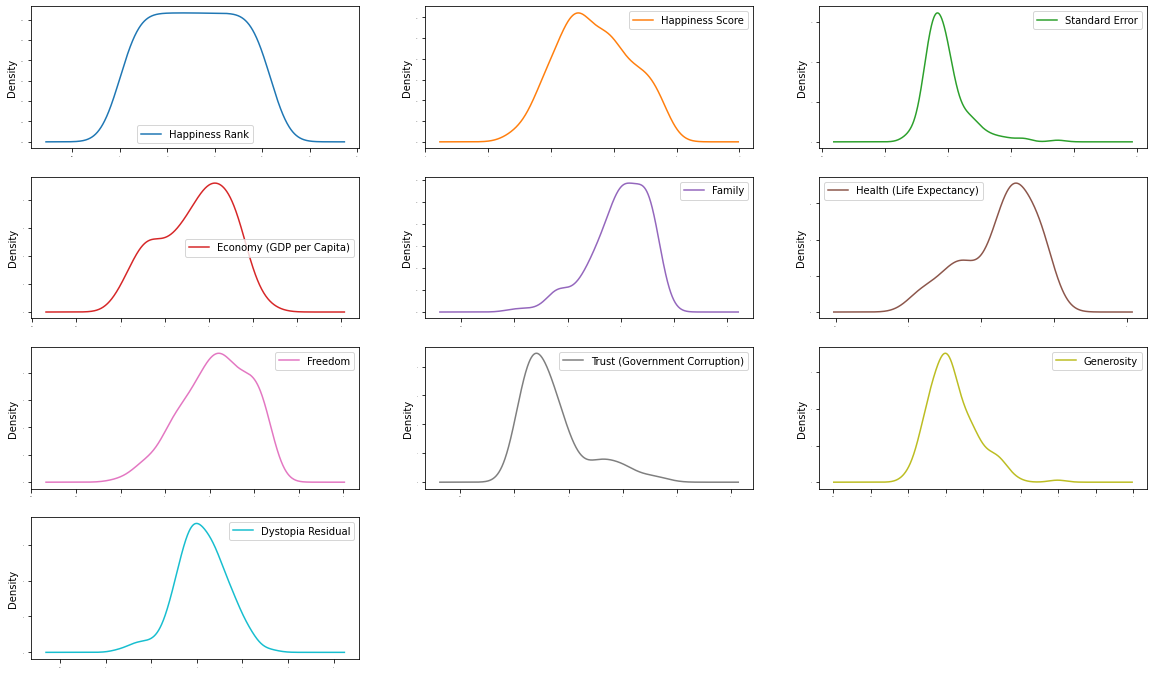

In [436]:
#Another example of multivariate analysis
df.plot(kind='density',subplots=True,layout=(4,3),sharex=False,fontsize=1,figsize=(20,12))
plt.show()

In [437]:
#sns.pairplot(df)#One more example of multivariate analysis
#plt.show()

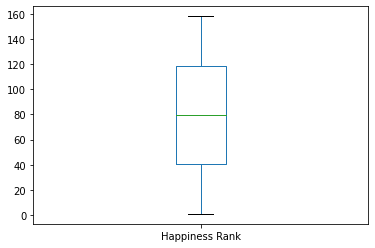

In [438]:
#Plotting boxplots
df['Happiness Rank'].plot.box()

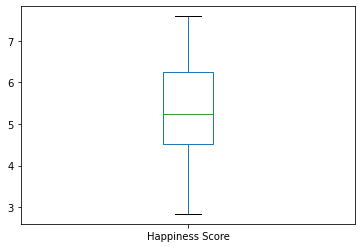

In [439]:
df['Happiness Score'].plot.box()

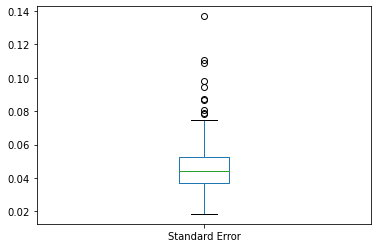

In [440]:
df['Standard Error'].plot.box()

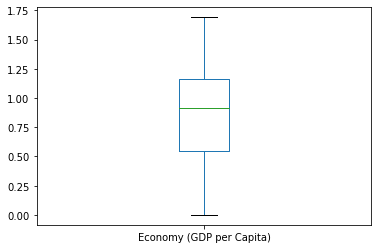

In [441]:
df['Economy (GDP per Capita)'].plot.box()

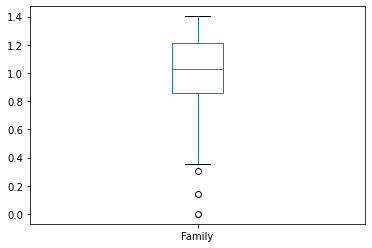

In [442]:
df['Family'].plot.box()

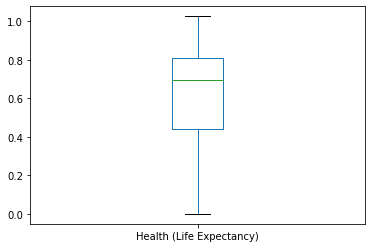

In [443]:
df['Health (Life Expectancy)'].plot.box()

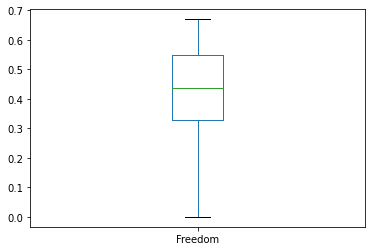

In [444]:
df['Freedom'].plot.box()

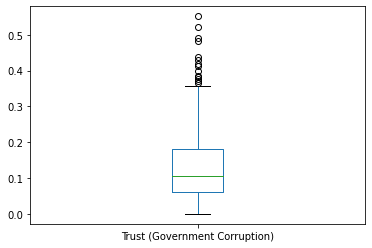

In [445]:
df['Trust (Government Corruption)'].plot.box()

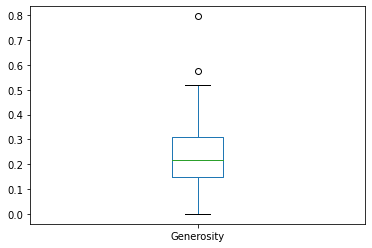

In [446]:
df['Generosity'].plot.box()

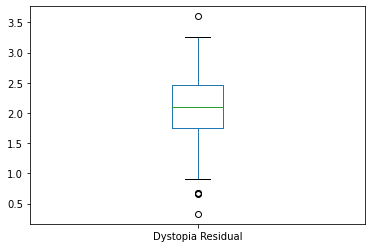

In [447]:
df['Dystopia Residual'].plot.box()

In [448]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Country']=LE.fit_transform(df['Country'])

In [449]:
df['Region']=LE.fit_transform(df['Region'])

In [450]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [451]:
#Finding outliers
z=np.abs(zscore(df))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [452]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [453]:
z[155][11]

3.2084304855119408

In [454]:
print('shape before removing the outliers:',df.shape)
dfnew=df[(z<3).all(axis=1)]
print('shape after removing the outliers:',dfnew.shape)

shape before removing the outliers: (158, 12)
shape after removing the outliers: (149, 12)


In [455]:
df=dfnew

In [456]:
#Splitting the independent and target variable x and y
x=df.drop('Dystopia Residual',axis=1)
y=df['Dystopia Residual']

In [457]:
x.shape

(149, 11)

In [458]:
y.shape

(149,)

In [459]:
#Checking skewness
x.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
dtype: float64

We can see skewness in the dataset,we will remove the skewness using power transform function

In [460]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [461]:
df_new.skew()

Country                         -0.267371
Region                          -0.222589
Happiness Rank                  -0.266578
Happiness Score                 -0.017940
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
dtype: float64

Skewness has been removed,now we can proceed with further steps

In [462]:
x=df_new

In [463]:
x.shape

(149, 11)

In [464]:
y.shape

(149,)

In [465]:
#Finding best random state
maxr2=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predrf=lm.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2,'on Random_State',maxRS)       

Best accuracy is 0.9854523823807793 on Random_State 81


In [466]:
#Creating train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=81)

In [467]:
x_train.shape

(104, 11)

In [468]:
x_test.shape

(45, 11)

In [469]:
y_train.shape

(104,)

In [470]:
y_test.shape

(45,)

In [471]:
lm=LinearRegression()

In [472]:
lm.fit(x_train,y_train)

LinearRegression()

In [473]:
lm.score(x_train,y_train)

0.9682987069715591

In [474]:
pred=lm.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)

Predicted result price: [1.56529967 2.43852597 2.28830388 2.0051671  3.54556145 1.87410427
 2.50179977 2.74989186 1.94605241 2.14670051 1.8603012  3.07460519
 2.66171919 2.46640434 1.53522545 1.72375597 2.05913417 2.00805649
 2.4846555  2.05663238 2.83553822 2.39016575 2.36478704 1.14298944
 2.77496468 2.69310885 2.21175628 3.17486265 2.66055776 1.65692525
 0.88307439 1.54865612 2.29497959 1.70552223 0.7184878  2.93635142
 2.08413835 2.29055754 3.03375013 2.74990764 2.09022199 2.29082629
 2.84006725 1.9820481  2.12632909]
actual price 65     1.59888
33     2.31945
43     2.23741
81     1.87996
13     3.60214
48     1.73797
91     2.45373
24     2.84848
60     1.88541
79     2.00073
38     1.87634
80     3.10709
5      2.61955
21     2.47489
129    1.59541
138    1.68135
125    2.05125
139    1.95812
55     2.44649
49     2.02518
42     2.74255
7      2.37119
14     2.51011
142    0.99895
68     2.76579
84     2.63430
52     2.18896
41     3.03500
26     2.67585
109    1.69440
133    0.

In [475]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
0.005201186030470258


In [476]:
print(r2_score(y_test,pred))

0.9854523823807793


In [477]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)


SVR(kernel='linear')

In [478]:
svr.score(x_train,y_train)


0.9661690103156602

In [479]:
pred_y=svr.predict(x_test)

In [480]:
print('error:')
print(mean_squared_error(y_test,pred_y))

error:
0.006215029684010941


In [481]:
print(r2_score(y_test,pred_y))

0.9826166811174561


In [482]:
#cross validation
from sklearn.model_selection import cross_val_score

In [483]:
lmscores=cross_val_score(lm,x,y,cv=5)
print('Cross validation score of linear regression model:',lmscores.mean())


Cross validation score of linear regression model: 0.8649664800777369


In [484]:
svrscores=cross_val_score(svr,x,y,cv=5)
print('Cross validation score of support vector regressor model:',svrscores.mean())

Cross validation score of support vector regressor model: 0.9062704850442038


The best model is Support Vector Regressor beacause the difference between r2_score and cross_val_score is(0.98-0.90=.08)where in linear Regression model the difference is(0.99-0.86=0.13).The difference is less in Support Vector Regressor ,so it is the best model.

In [485]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [489]:
#Creating parameters list to pass in GridSearchCV
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 10, 'kernel': 'linear'}
0.9546674749032495


After tuning the parameters,the accuracy of the model is increased by 5%.


In [490]:
import joblib
joblib.dump(clf.best_score_,'HappinessReportfile.obj')

['HappinessReportfile.obj']